In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

In [14]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.quickplots import draw_projection_plots

### Collect data

In [15]:
DATASET_ID = 'koumura_bengalese_finch'

In [16]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

In [17]:
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'bf.pickle'
df_loc

PosixPath('/home/AD/tsainbur/github_repos/avgn_paper/data/syllable_dfs/koumura_bengalese_finch/bf.pickle')

In [18]:
syllable_df = pd.read_pickle(df_loc)

In [19]:
len(syllable_df)

214925

In [20]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [21]:
syllable_df[:3]

start_time  end_time labels  sequence_num   indv  indvi        key   rate  \
0       1.158     1.249      0             0  Bird3      0  Bird3_322  32000   
1       1.323     1.404      0             0  Bird3      0  Bird3_322  32000   
2       1.530     1.564      0             0  Bird3      0  Bird3_322  32000   

                                         spectrogram  
0  [[0, 0, 0, 110, 190, 203, 216, 217, 216, 219, ...  
1  [[0, 0, 0, 54, 164, 182, 187, 191, 196, 196, 1...  
2  [[0, 0, 0, 0, 0, 106, 100, 181, 209, 202, 196,...

### cluster

In [22]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

Bird3 29470


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

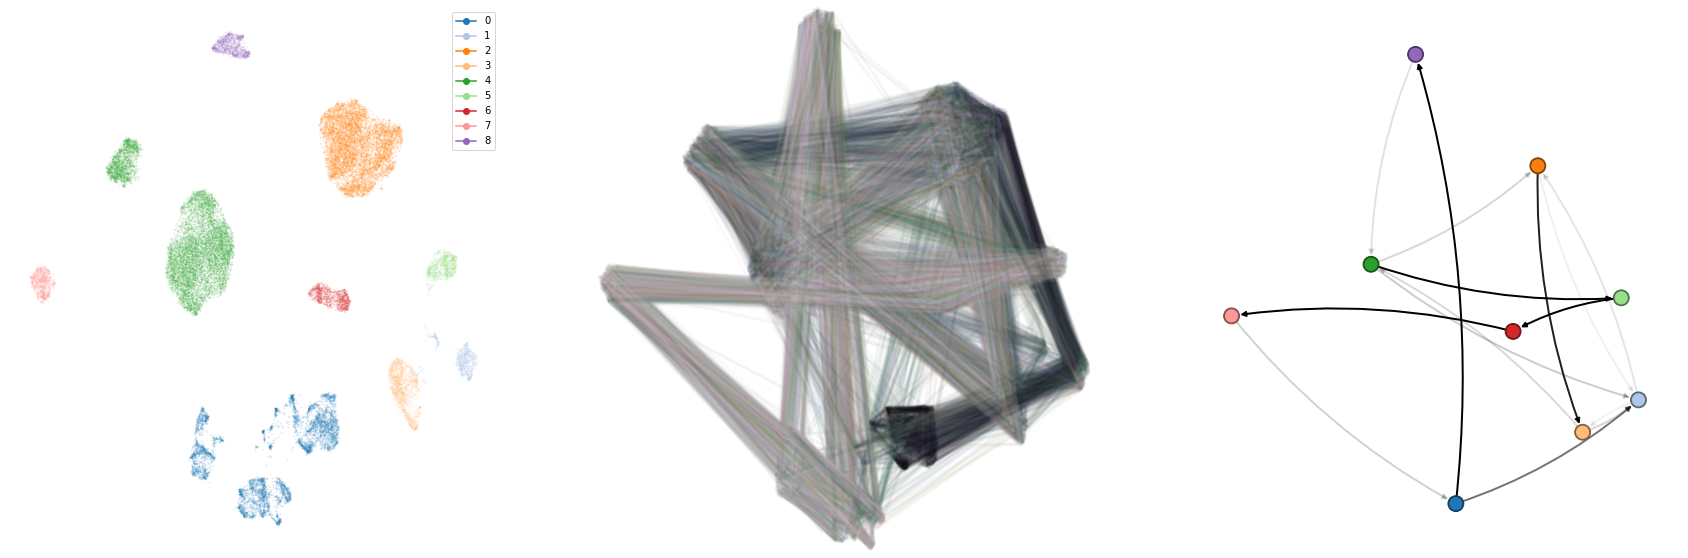

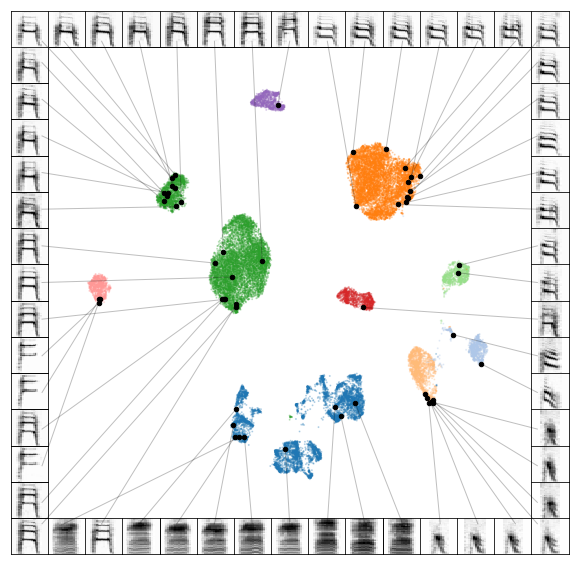

Bird1 35728


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

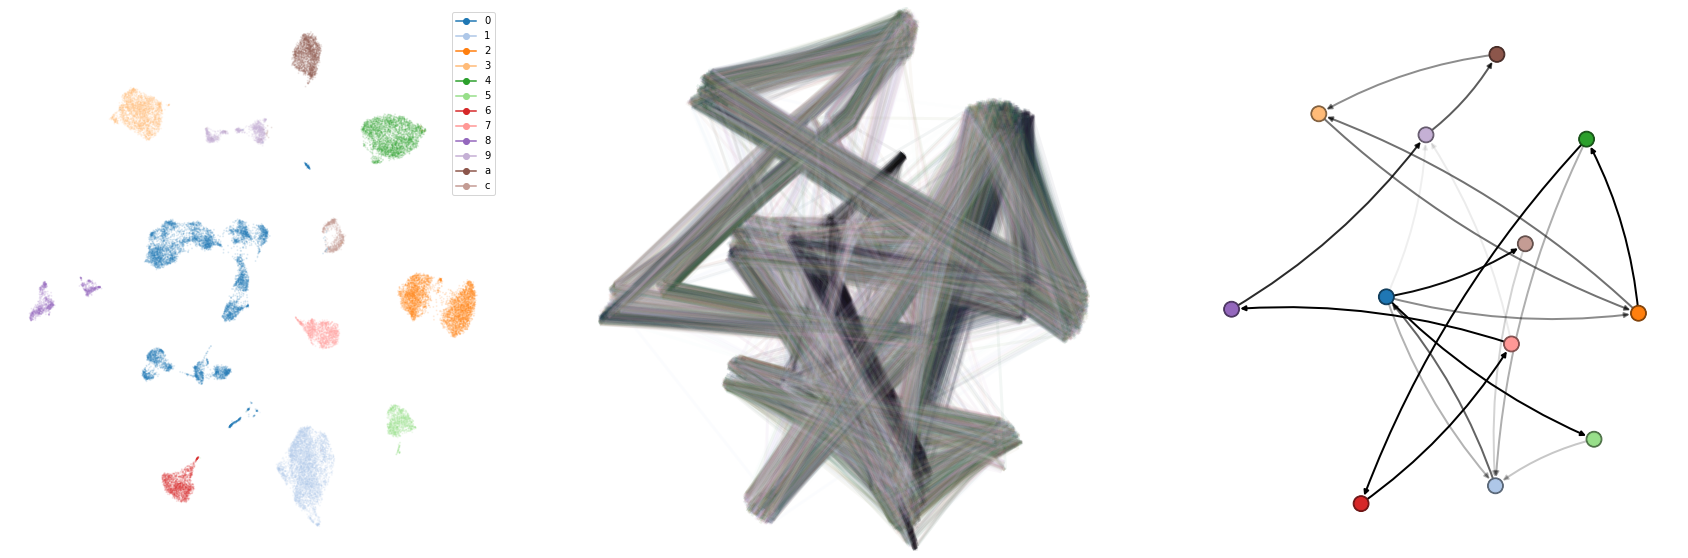

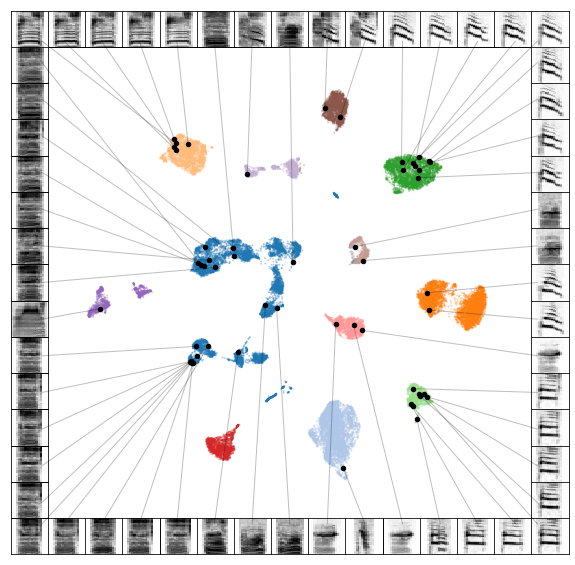

Bird4 26891


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

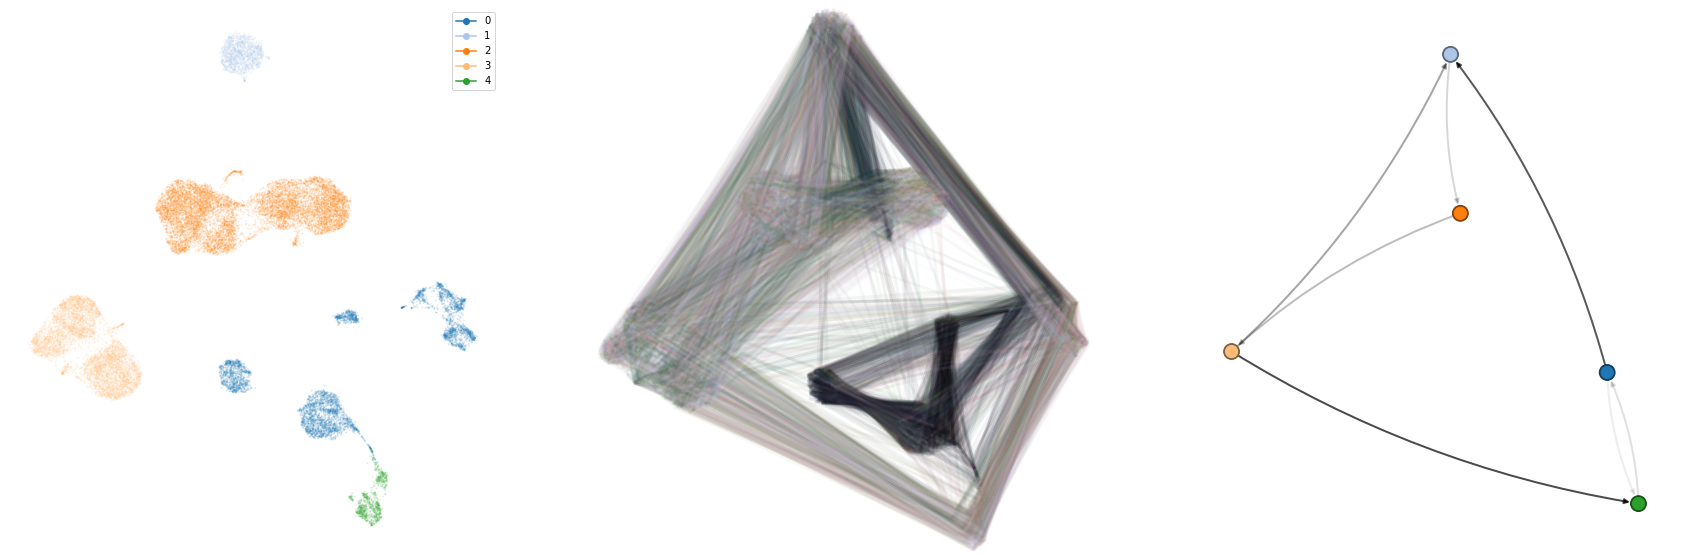

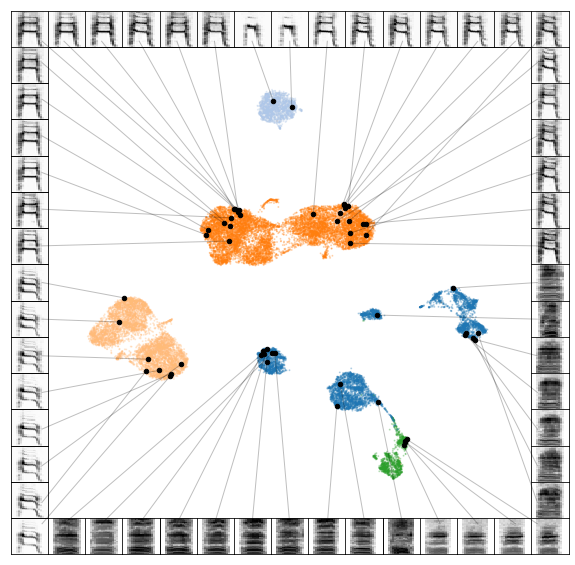

Bird6 17653


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

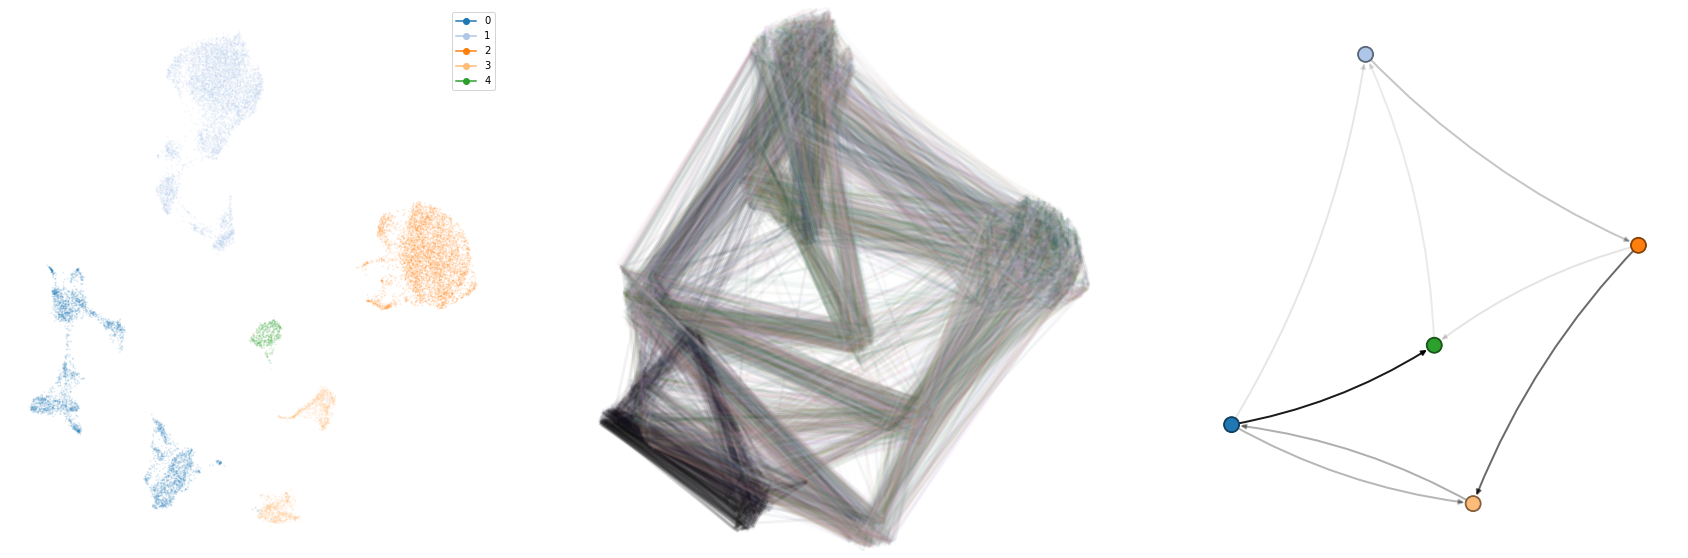

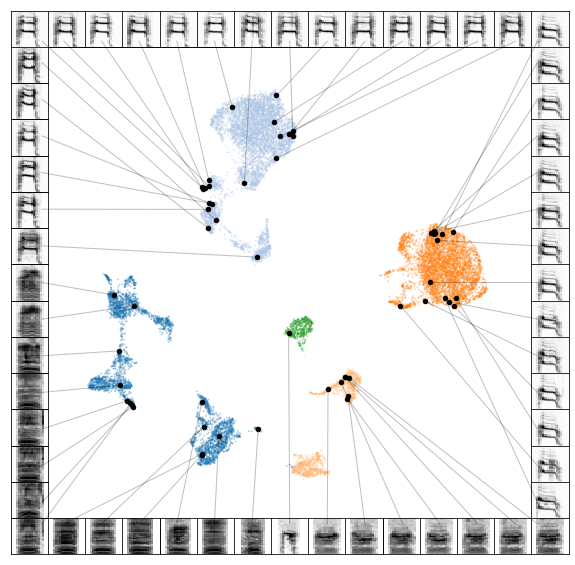

Bird7 20722


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

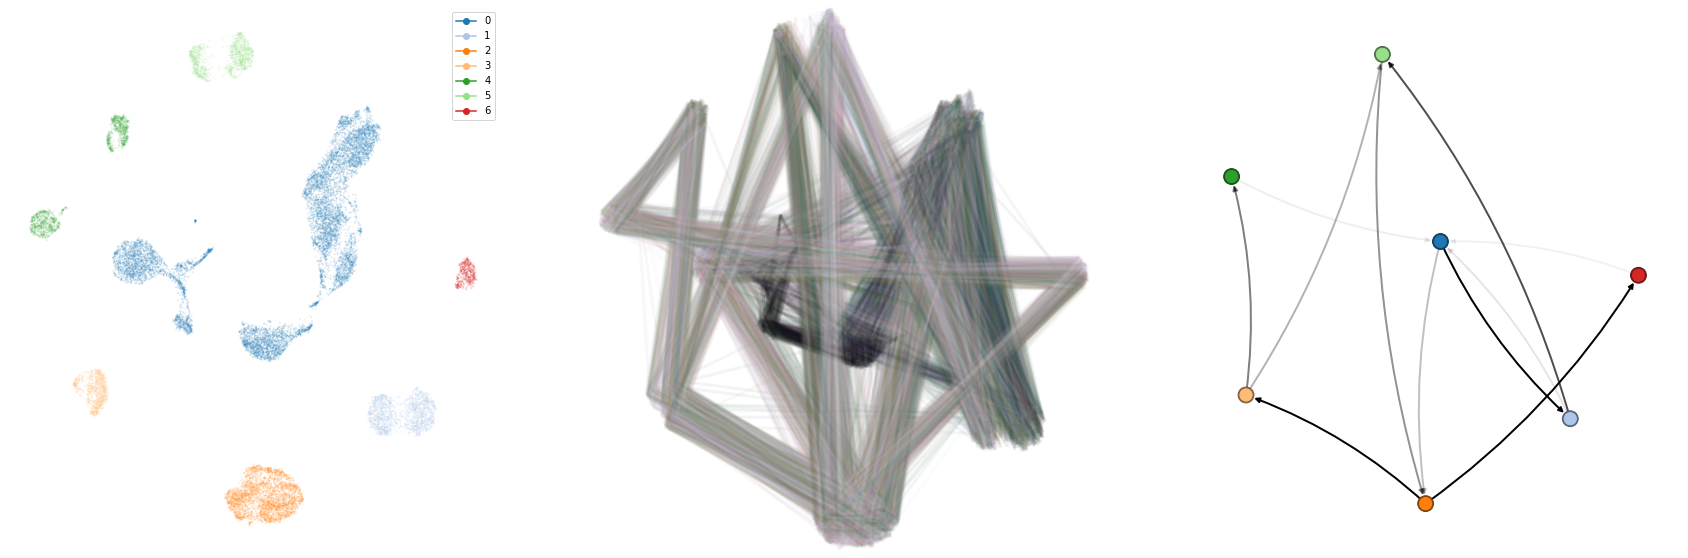

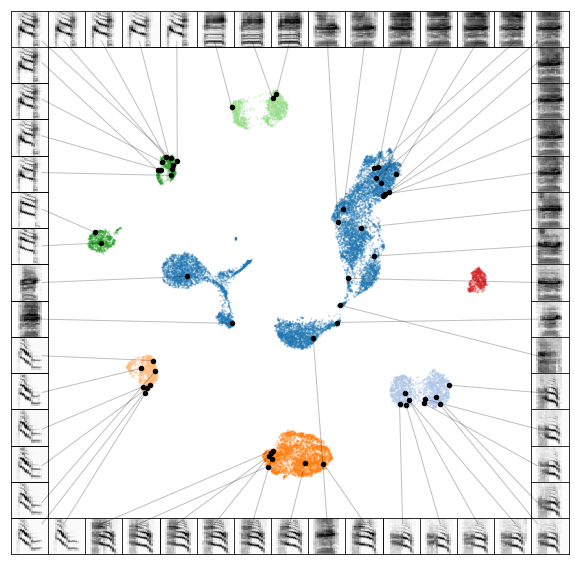

Bird9 19541


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

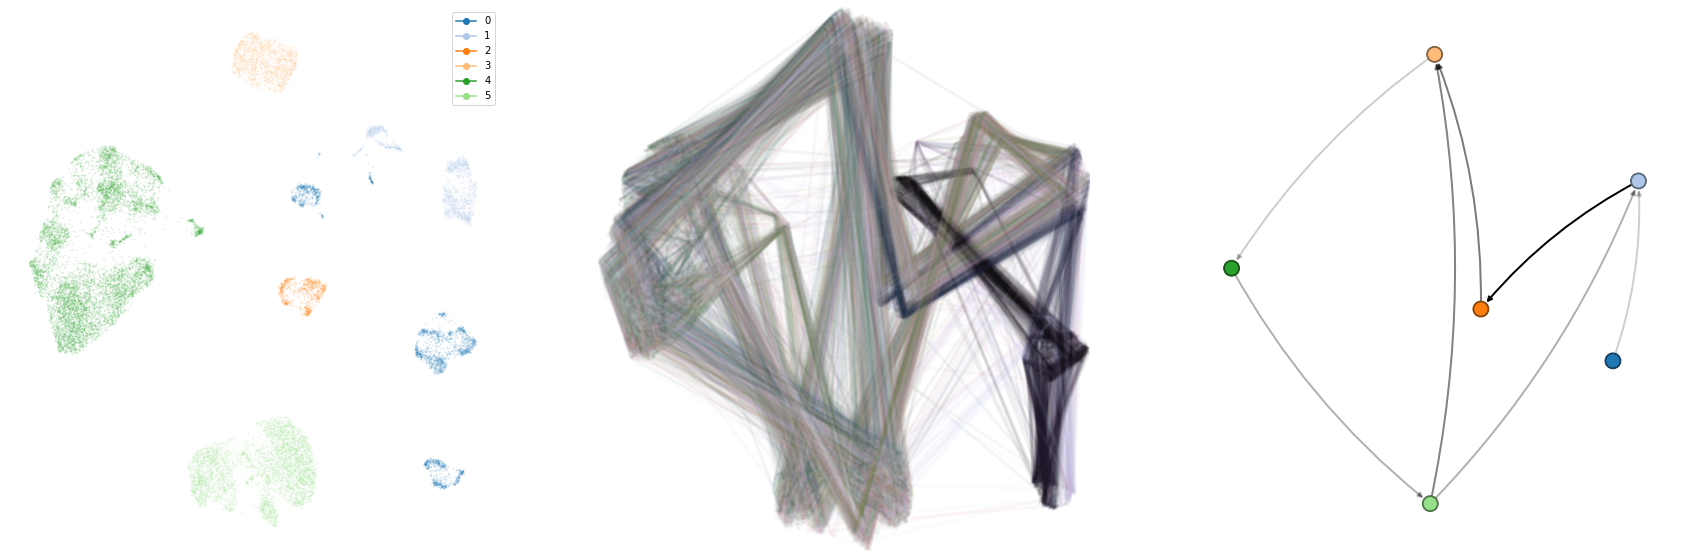

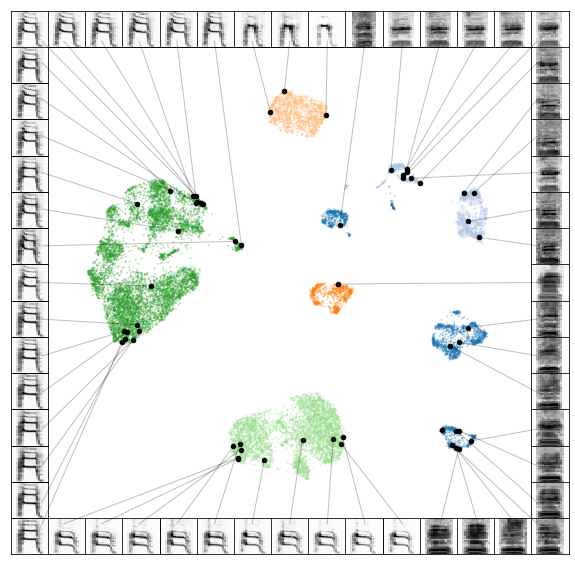

Bird2 26015


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 11 separate connected components using meta-embedding (experimental)
  n_components
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully co

/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

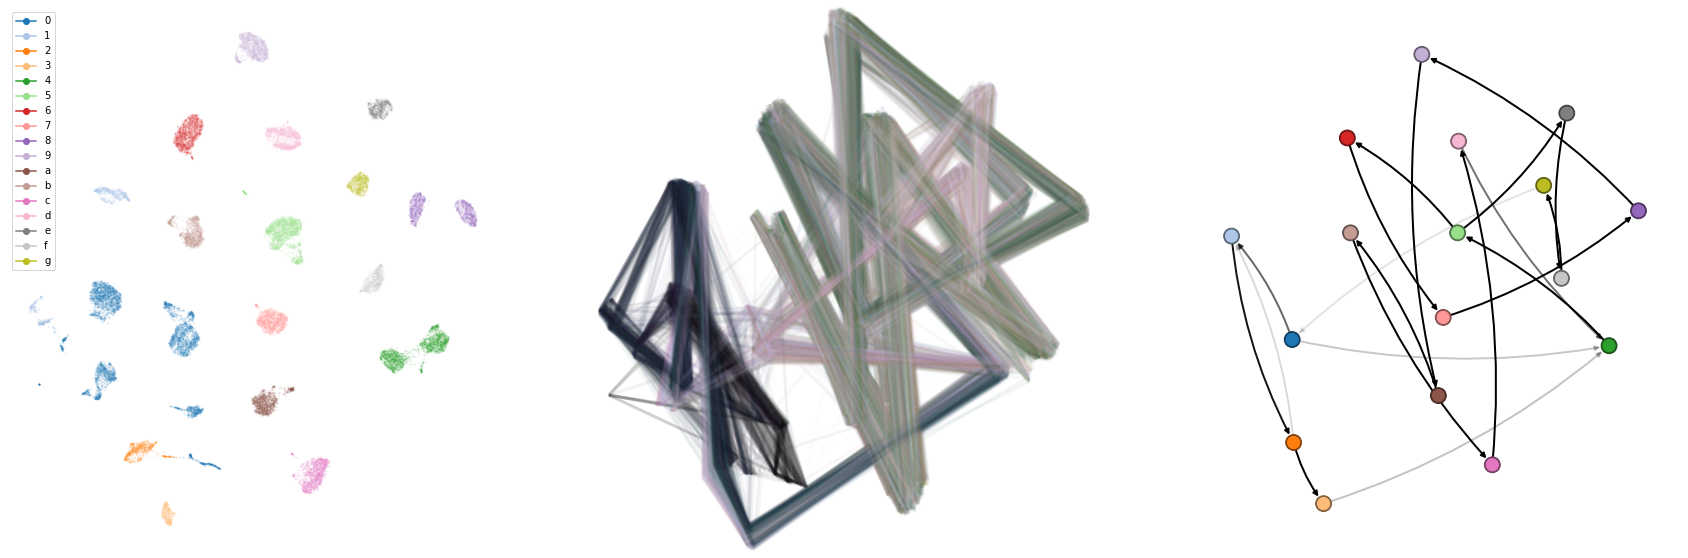

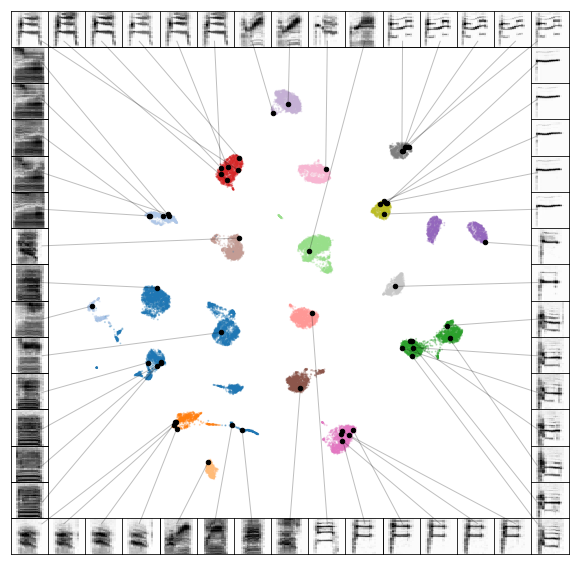

Bird10 5743


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

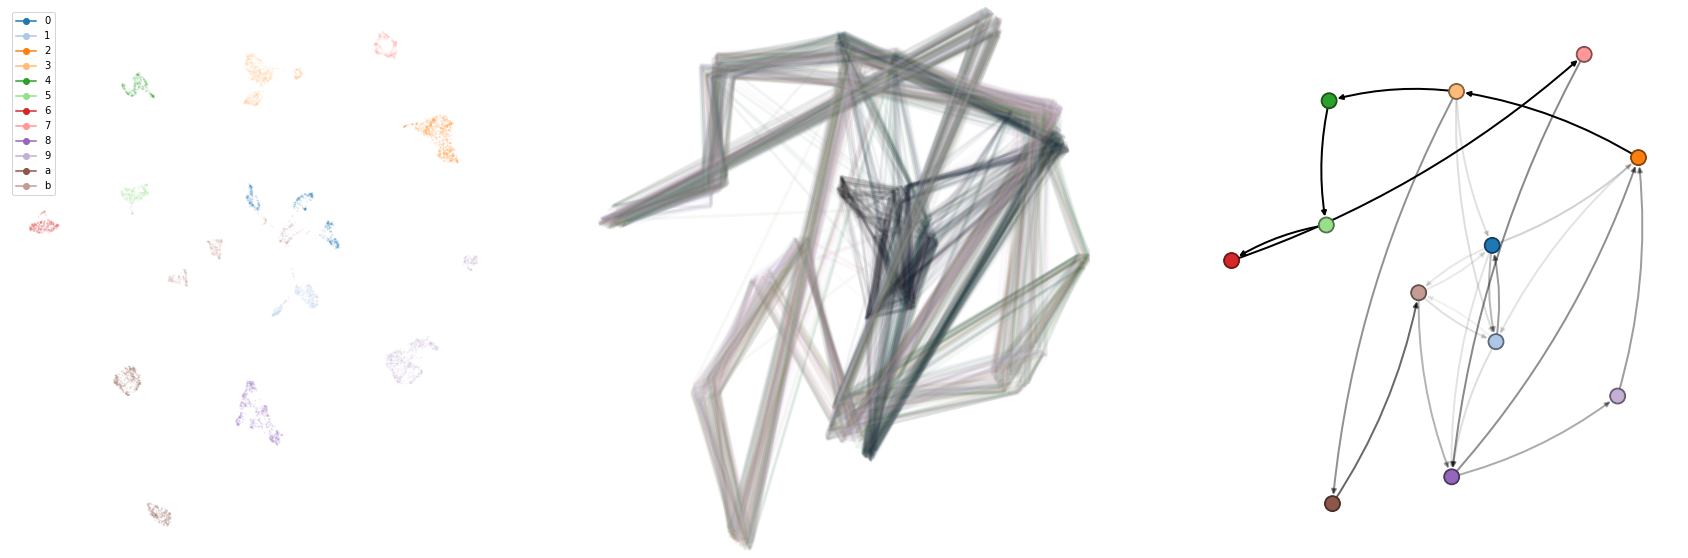

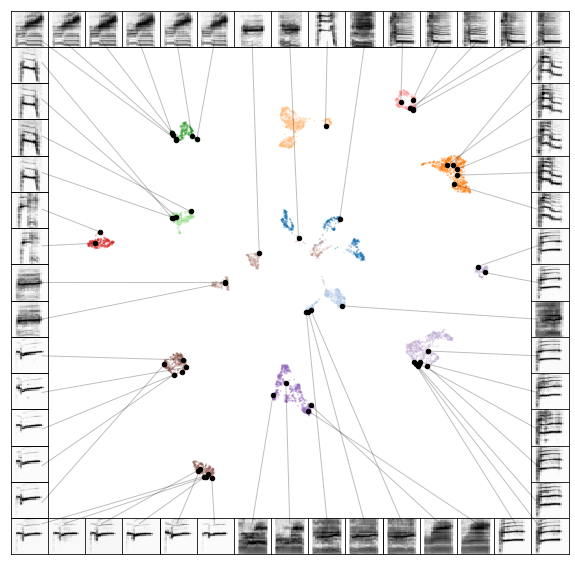

Bird5 20525


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully con

/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

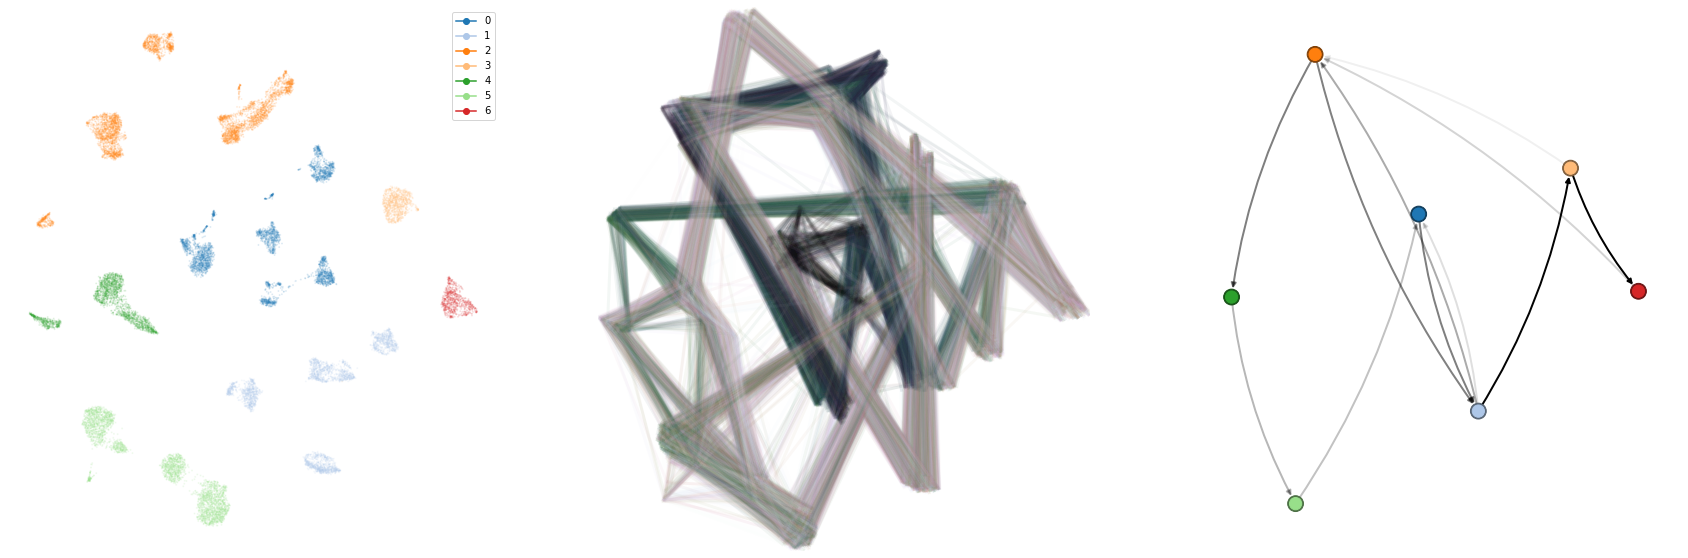

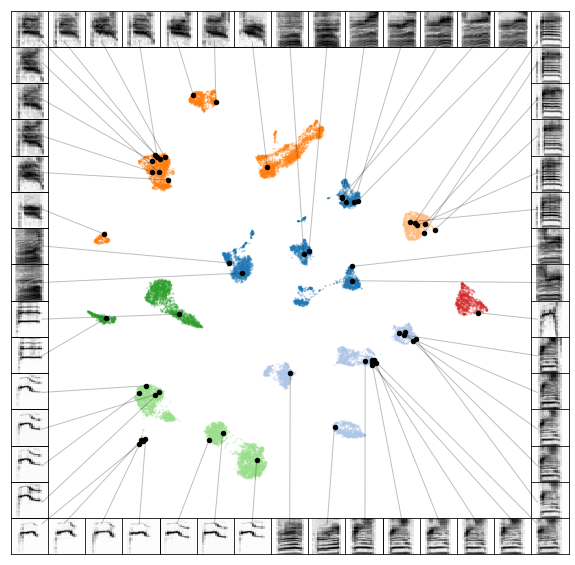

Bird0 7652


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

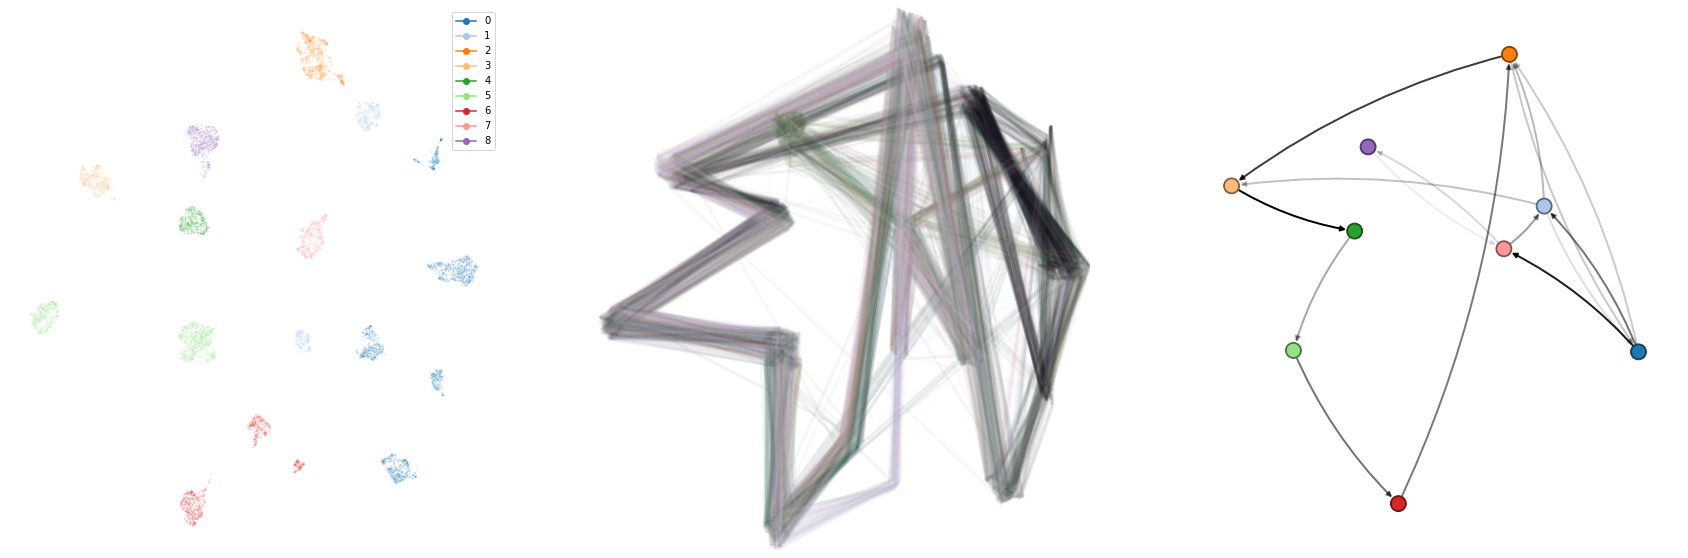

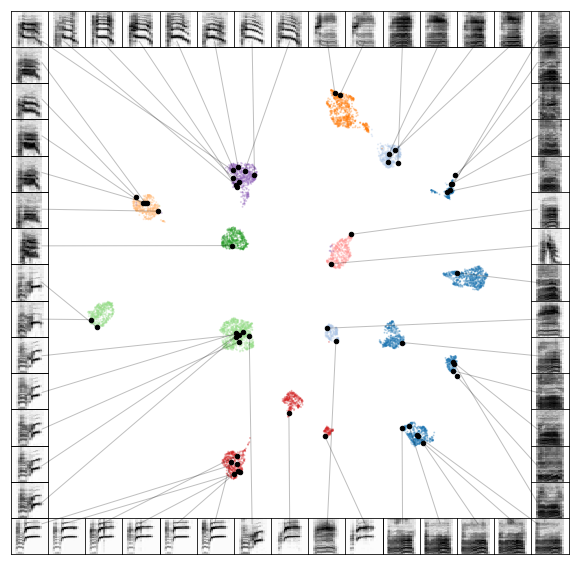

Bird8 4985


/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/AD/tsainbur/miniconda3/envs/tim_py3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos_locs = np.vstack(pos.values())
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:265: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:272: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color)
/home/AD/tsainbur/github_repos/avgn_paper/avgn/visualization/network_graph.py:281: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib

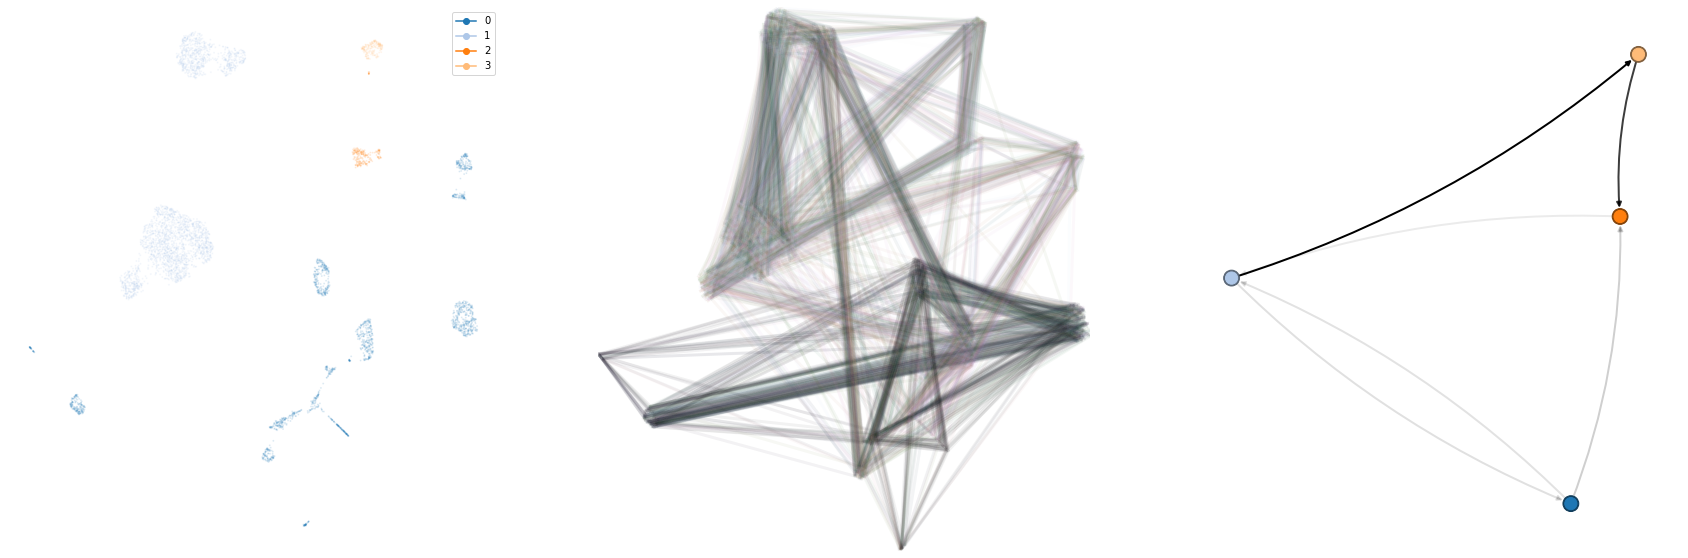

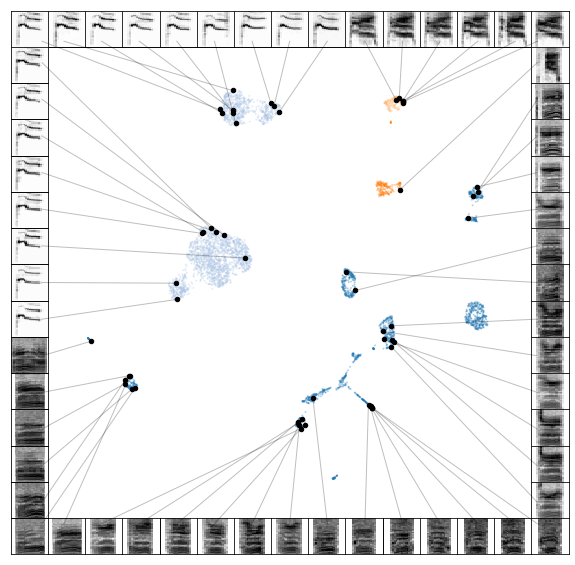

In [23]:
for indv in tqdm(syllable_df.indv.unique()):
    indv_df = syllable_df[syllable_df.indv == indv]
    indv_df = indv_df.sort_values(by=["key", "start_time"])
    print(indv, len(indv_df))
    #indv_df = indv_df[:20000]
    specs = list(indv_df.spectrogram.values)
    #draw_spec_set(specs, zoom=1, maxrows=10, colsize=25)
    # umap
    specs_flattened = flatten_spectrograms(specs)
    fit = umap.UMAP(min_dist=0.25)
    z = list(fit.fit_transform(specs_flattened))
    indv_df["umap"] = z
    
    # sequencing
    indv_df["syllables_sequence_id"] = None
    indv_df["syllables_sequence_pos"] = None
    for ki, key in enumerate(indv_df.key.unique()):
        indv_df.loc[indv_df.key == key, "syllables_sequence_id"] = ki
        indv_df.loc[indv_df.key == key, "syllables_sequence_pos"] = np.arange(
            np.sum(indv_df.key == key)
        )
        
    # plot
    draw_projection_plots(indv_df, label_column="labels")
    plt.show()
    
    scatter_spec(
        np.vstack(z),
        specs,
        column_size=15,
        #x_range = [-5.5,7],
        #y_range = [-10,10],
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(indv_df.labels.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True
    );
    plt.show()
    
    ensure_dir(FIGURE_DIR / 'bf')
    save_fig(FIGURE_DIR / 'bf' / ('bf_koumura_'+indv), dpi=300, save_jpg=True)
    
